In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

from sklearn import preprocessing

In [2]:
df = pd.read_csv("../data/bank.csv")

In [3]:
df_encoded = df.apply(preprocessing.LabelEncoder().fit_transform)

# Cluster Analysis

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters=3)

In [6]:
km.fit(df_encoded.iloc[:, :16])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
#Clusters for the data

In [8]:
km.labels_

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

#### Exercise:
Plot any two(or three) variables and color it on cluster
and visualize the output

# Principal Component Analysis

In [9]:
from sklearn.decomposition import PCA

In [10]:
model_pca = PCA(n_components=2)

In [11]:
X = np.array(df_encoded.iloc[:,:16])
y = df_encoded.iloc[:,16]

In [12]:
model_pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
new_X = model_pca.transform(X)

In [14]:
new_X = pd.DataFrame(new_X)

In [15]:
new_X.columns= ["PCA1", "PCA2"]

In [16]:
new_X.head()

,PCA1,PCA2
0,970.319735,647.222761
1,-844.554863,936.313658
2,303.731254,882.187663
3,1031.672485,202.272251
4,-714.718057,322.326810


In [17]:
new_X["deposit"] = y

In [18]:
new_X.head()

,PCA1,PCA2,deposit
0,970.319735,647.222761,1
1,-844.554863,936.313658,1
2,303.731254,882.187663,1
3,1031.672485,202.272251,1
4,-714.718057,322.326810,1


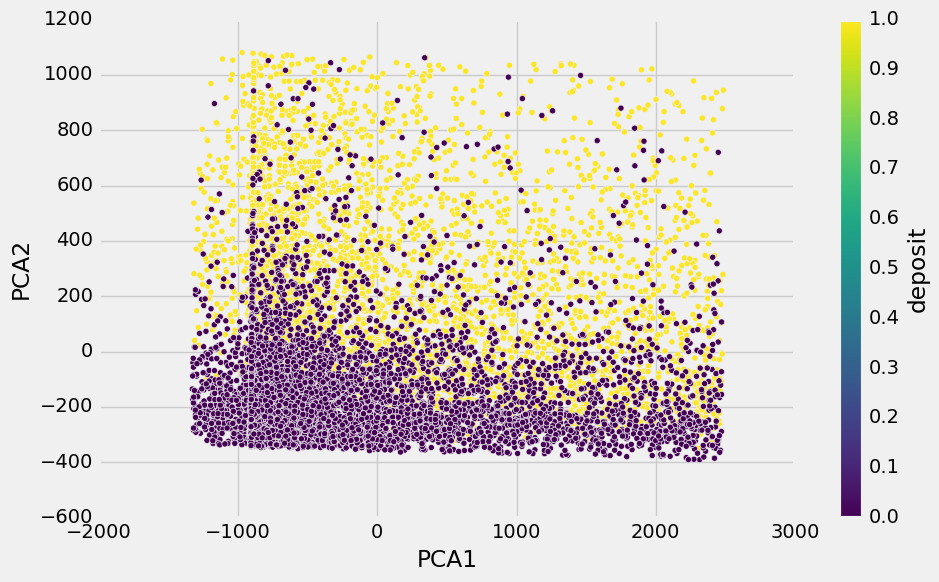

In [19]:
new_X.plot(kind="scatter", x="PCA1", y="PCA2",c="deposit",
          cmap=plt.cm.viridis)